# Problem

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data visualization 

 Create histograms for each feature to visualize the distribution of values.

In [6]:
# #Checking number of unique rows in each feature

df.nunique().sort_values()

Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

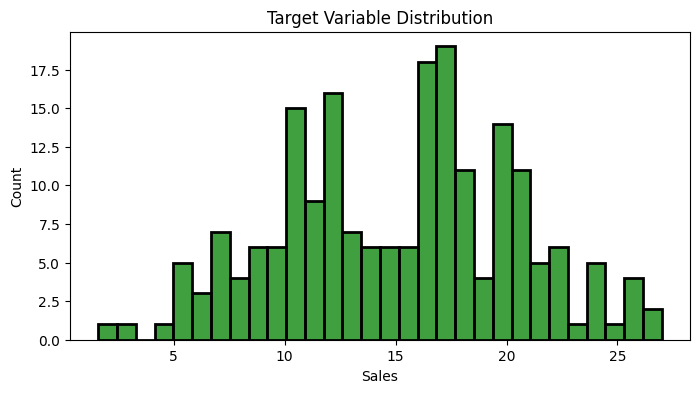

In [7]:
target = 'Sales'
# analyzing the distribution of the target variable

plt.figure(figsize=[8,4])
sns.histplot(df[target], color='g',edgecolor="black", linewidth=2, bins=30)
plt.title('Target Variable Distribution')
plt.show()

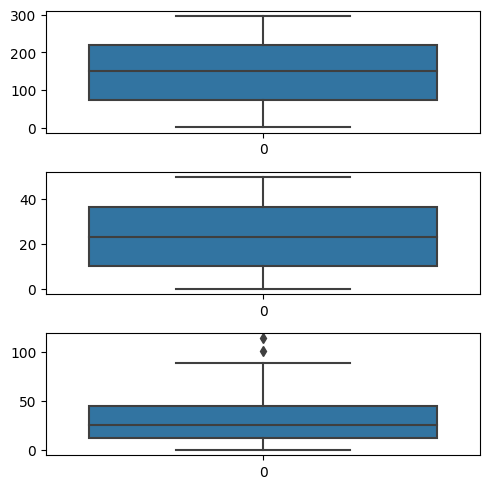

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Radio'], ax = axs[1])
plt3 = sns.boxplot(df['Newspaper'], ax = axs[2])
plt.tight_layout()

we have 2 outliers in newspaper column. Let's check them out.

In [9]:
# Q3 - highest 25%, IQR - middle 50%

Q3_newspaper = df['Newspaper'].quantile(0.75)
Q1_newspaper = df['Newspaper'].quantile(0.25)
IQR_newspaper = Q3_newspaper - Q1_newspaper

upper_threshold = Q3_newspaper + 1.5 * IQR_newspaper

potential_outliers = df[df['Newspaper'] > upper_threshold]

print("Potential Outliers in Newspaper Column:")
potential_outliers

Potential Outliers in Newspaper Column:


,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


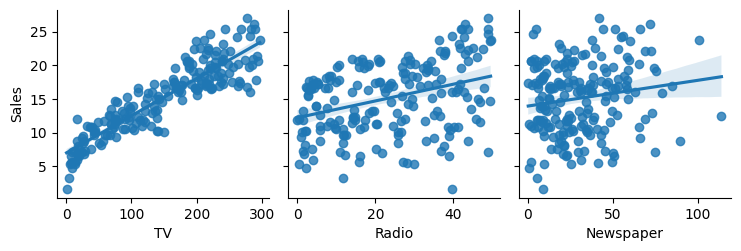

In [10]:
# how is sales related to features
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg') 
plt.show()

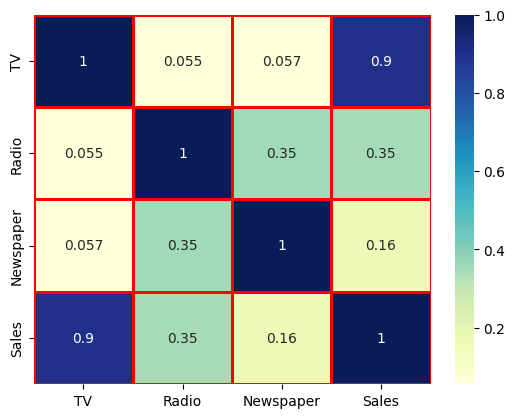

In [11]:
sns.heatmap(df.corr(),annot=True,linewidth=0.8,linecolor='red',cmap='YlGnBu')
plt.show()

TV seems to be most correlated with Sales.

# Separating data

In [12]:
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [13]:
# dropping irrelevant features
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [14]:
x.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [15]:
y.head(3)

0    22.1
1    10.4
2    12.0
Name: Sales, dtype: float64

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Data Modelling

#  Linear regression model 

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)

In [19]:
predict = lr.predict(x_train)

# Testing

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression model

In [21]:
# testing training data
lr_mse = mean_squared_error(y_train, predict)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 2.773493189701067


In [22]:
# testing test data by mean_squared_error
lm = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", lm)

Linear Regression MSE: 2.722866082025964


In [23]:
# testing test data by r2_score
linear_r2 = r2_score(y_test, y_pred)
print("R-squared:", linear_r2)

R-squared: 0.9031541781049791


# Lasso regression model 

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [25]:
y_pred2 = lasso_reg.predict(x_test)

# Testing

In [26]:
# mean_squared_error
lasso_mse = mean_squared_error(y_test, y_pred2)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 2.725227175592189


In [27]:
# r2_score
lasso_r2 = r2_score(y_test, y_pred2)
print("R-squared:", lasso_r2)

R-squared: 0.9030701996645771


# Ridge regression model 

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

Ridge()

In [29]:
y_pred3 = ridge_reg.predict(x_test)

# Testing

In [30]:
# mean_squared_error
ridge_mse = mean_squared_error(y_test, y_pred3)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 2.7228956424527087


In [31]:
# r2_score
ridge_r2 = r2_score(y_test, y_pred3)
print("R-squared:", ridge_r2)

R-squared: 0.9031531267114338


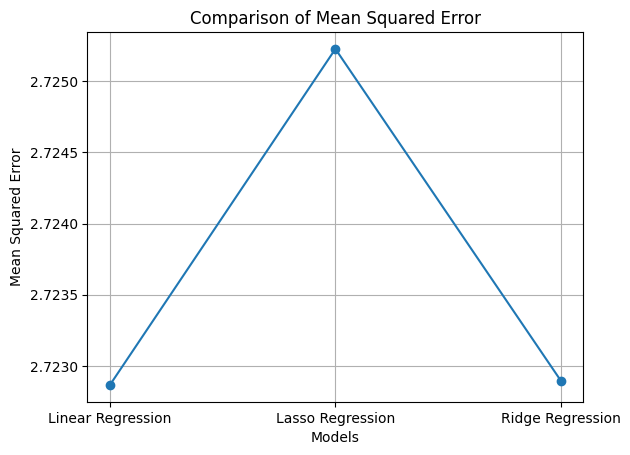

In [32]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mse_values = [lm, lasso_mse, ridge_mse]

line_plot = plt.plot(models, mse_values, marker='o')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.grid(True)
plt.show()

# visualisation
linear, lasso and ridge regression model's mean_squared_error, minimum is of linear regression.

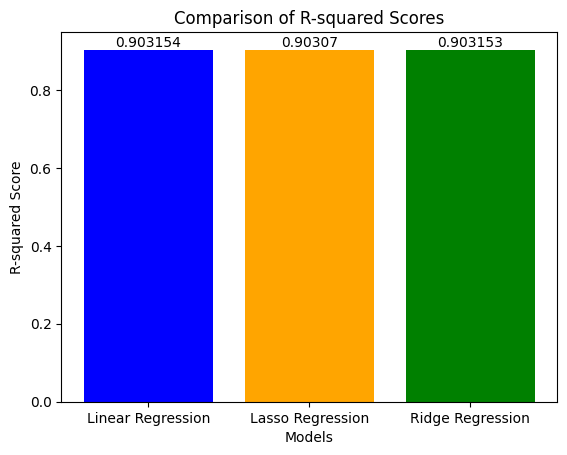

In [33]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
r2_scores = [linear_r2, lasso_r2, ridge_r2]

bar = plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.bar_label(bar)
plt.show()

# visualisation
linear, lasso and ridge regression model's r2_score, maximum is of linear regression.

It is better to use linear regression algorithm performed better than other algorithms.